In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(style="white")

## Looking at Amenity Count vs. Price
### Goals for this step:
- normalize Price data per country 
        Airbnb Price / Price Mean per Country
- explore the data using line graphs for different countries
- create a linear regression model that models all countries
- try to increase accuracy of linear regression model with polynomial regression

In [2]:
df = pd.read_pickle("../../Datasets/Data_viz_project/airbnb_listings_countries.pkl")

### Create a column with the normalized prices


In [4]:
df.head()

,Listing ID,Name,Host ID,Host Name,Host Response Rate,Host Is Superhost,Host total listings count,Country,latitude,longitude,...,Last Review Date,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month,Amenity_Count
0,5534229,A 2 Passi da San Pietro,28697142,Veronica,100.0,False,5.0,Italy,41.895878,12.454430,...,2015-08-29,90.0,9.0,10.0,8.0,8.0,9.0,9.0,0.08,11
1,5903406,cosy small apartment,1853799,Veronika,88.0,False,2.0,Austria,48.246033,16.340743,...,2017-09-09,87.0,9.0,10.0,10.0,10.0,10.0,8.0,0.27,12
2,5203533,Rummelig lejl i hjertet af KBH,24801534,Marianne,100.0,False,1.0,Denmark,55.681579,12.562770,...,2016-07-26,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.28,8
3,8858475,Modern; spacious and warm; with its own balcony,3000397,Lasse,100.0,True,1.0,Denmark,55.708413,12.596737,...,2017-05-07,100.0,10.0,10.0,10.0,10.0,9.0,10.0,0.79,23
4,4215511,Nice room; Bohemian Cph; N�rrebro,126020,Lea,100.0,True,2.0,Denmark,55.687506,12.558365,...,2017-05-08,94.0,10.0,10.0,9.0,10.0,10.0,10.0,1.40,10


In [3]:
df = df.assign(Country_Average=df.groupby("Country")["Price"].transform("mean"))

In [4]:
df = df.assign(Normalized=df["Price"]/df["Country_Average"])

In [7]:
# df.to_pickle("../../Datasets/Data_viz_project/airbnb_listings_price_normalized")

### Select only the columns we want to look at

In [8]:
df.columns

Index(['Listing ID', 'Name', 'Host ID', 'Host Name', 'Host Response Rate',
       'Host Is Superhost', 'Host total listings count', 'Country', 'latitude',
       'longitude', 'Property type', 'Room type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Amenities', 'Price', 'Minimum nights', 'Maximum nights',
       'Availability 365', 'Calendar last scraped', 'Number of reviews',
       'Last Review Date', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per month', 'Amenity_Count',
       'Country_Average', 'Normalized'],
      dtype='object')

In [12]:
df_select = df[["Listing ID", "Price", "Country",  "Amenity_Count", "Country_Average", "Normalized"]].copy()

In [10]:
df_select

,Listing ID,Price,Country,Amenity_Count,Country_Average,Normalized
0,5534229,74.0,Italy,11,91.331370,0.810236
1,5903406,55.0,Austria,12,65.086537,0.845029
2,5203533,993.0,Denmark,8,599.210534,1.657180
3,8858475,697.0,Denmark,23,599.210534,1.163197
4,4215511,424.0,Denmark,10,599.210534,0.707598
...,...,...,...,...,...,...
379050,20810636,150.0,United States,24,147.859080,1.014479
379051,9563852,35.0,France,9,92.577108,0.378063
379052,5841088,110.0,Australia,16,158.249852,0.695103
379053,12157261,69.0,Canada,13,112.929349,0.611001


### This graph shows the relationship between amenity count and the normalized price, per country

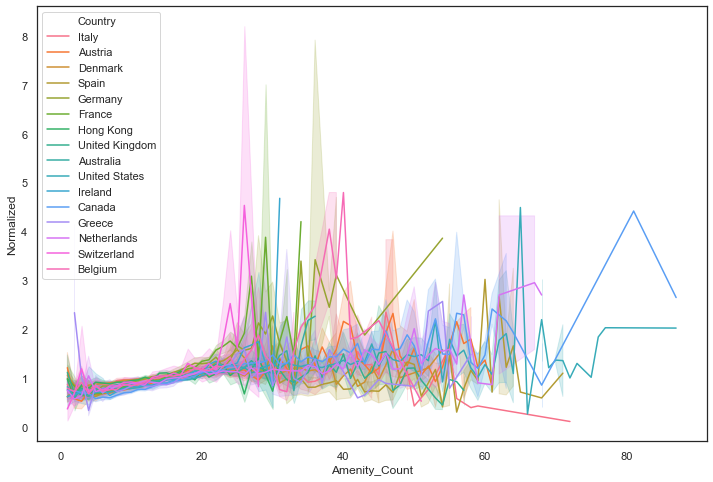

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data=df_select,
                 x="Amenity_Count",
                 y="Normalized",
                 hue="Country")

### Choosing Quantile to focus on
As a group, we chose to remove the outliers and to focus on 97.5% of the data, which have 30 or less amenities

In [14]:
df_select["Amenity_Count"].quantile(.975)

30.0

In [13]:
df_30 = df_select.loc[df_select["Amenity_Count"]<=30].copy()

### This graph shows the same relationship as the graph above; however, it focuses on listings with 30 amenities or below

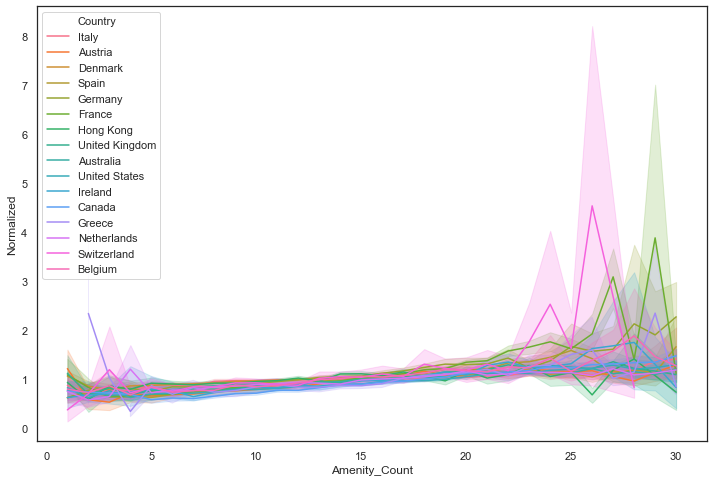

In [171]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data=df_30,
                 x="Amenity_Count",
                 y="Normalized",
                 hue="Country")

### These graphs shows the same relatnipship (amenity count to normalized price), but focuses on all the data as a whole

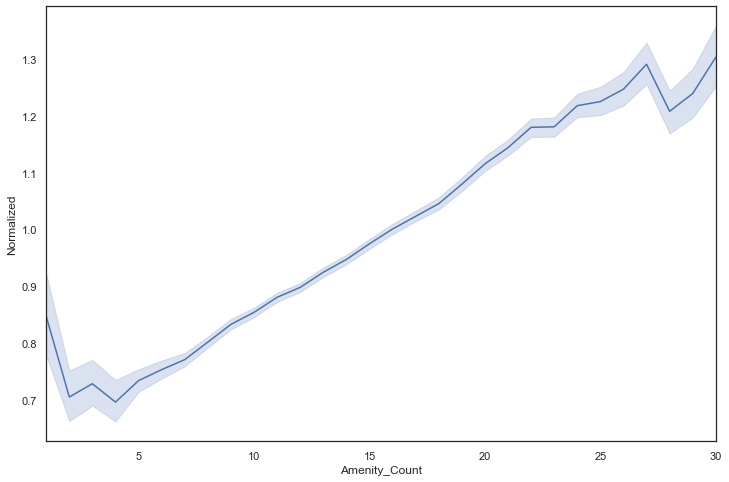

In [151]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data=df_30,
                 x="Amenity_Count",
                 y="Normalized")
ax.set_xlim([1,30]);

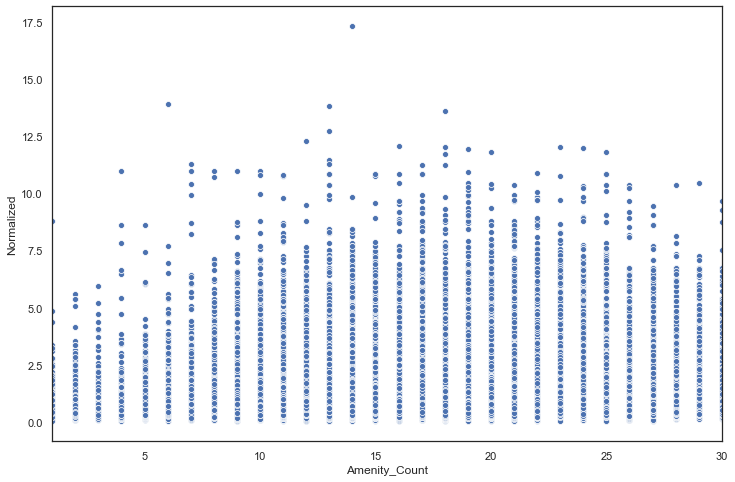

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=df_30,
                 x="Amenity_Count",
                 y="Normalized")
ax.set_xlim([1,30]);

### Because of the increase in normalized price when there are 1-5 amenities, we decided to take a closer look

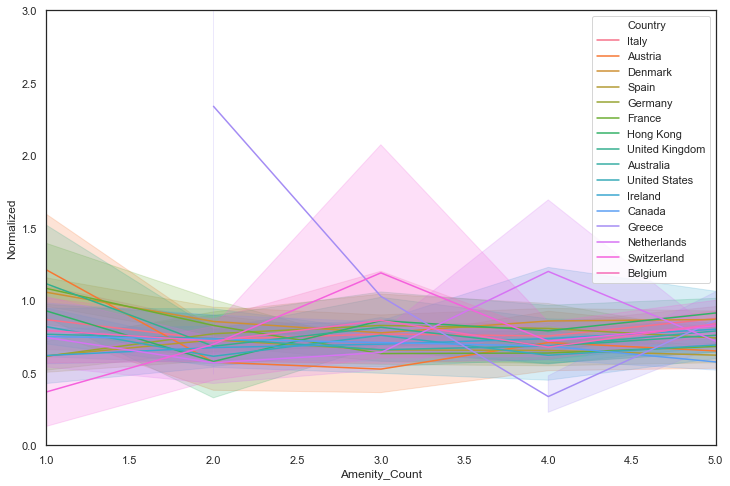

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data=df,
                 x="Amenity_Count",
                 y="Normalized",
                 hue="Country")
ax.set_xlim([1,5])
ax.set_ylim([0,3]);

In [9]:
df.loc[df["Amenity_Count"]==1].groupby("Country").agg({"Normalized":"mean", "Listing ID":"count", "Review Scores Rating":"mean"}).sort_values("Normalized")

,Normalized,Listing ID,Review Scores Rating
Country,,,
Switzerland,0.366655,2,90.000000
Germany,0.614191,17,94.588235
Spain,0.615782,46,87.021739
Ireland,0.618465,5,93.400000
Netherlands,0.743602,7,94.000000
Canada,0.749310,21,86.904762
Australia,0.765246,40,91.500000
Belgium,0.791229,9,91.555556
United States,0.818058,117,89.948718


It seems for the countries who are still making more than the mean even with 1 amenity (Austria, UK, France, and Denmark), they are more expensive countries overall. This is not a definetive analysis, and it would require more detailed locational and seasonal data to be able to fully understand. 

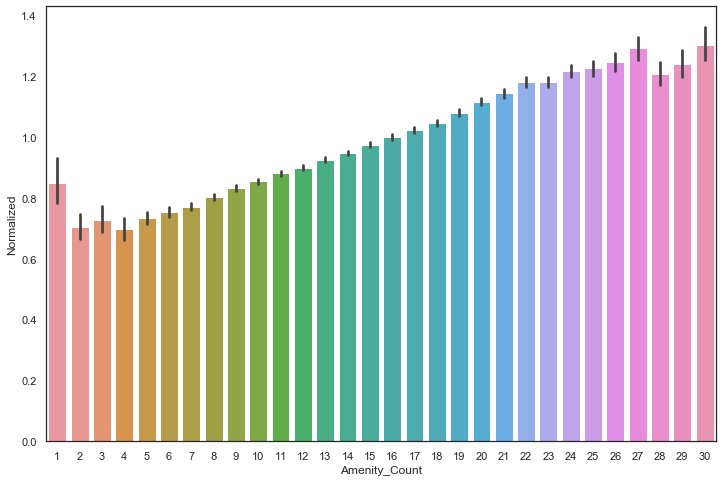

In [152]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=df_30,
                 x="Amenity_Count",
                 y="Normalized");

### Looking at the graph above, we wanted to create a linear regression model that could help predict how many amenities people would need in order to charge the price they wanted
 Process: use statsmodels OLS to try to find the correct regression model


### Regression One

In [12]:
df_30["Const"] = 1

In [13]:
X = df_30[["Amenity_Count", "Const"]]
y = df_30["Normalized"]

In [14]:
model = sm.OLS(y, X).fit()
result = model.predict(X)
df_30["Pred_1"] = result

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                 1.084e+04
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:12:54   Log-Likelihood:            -4.2670e+05
No. Observations:              371013   AIC:                         8.534e+05
Df Residuals:                  371011   BIC:                         8.534e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Amenity_Count     0.0247      0.000    104.106      0.000       0.024       0.025
Const             0.6072      0.004    155.294      0.000       0.600       0.615
==============================================================================
Omnibus:                   276277.544   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7221191.296
Skew:                           3.352   Prob(JB):                         0.00
Kurtosis:                      23.547   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

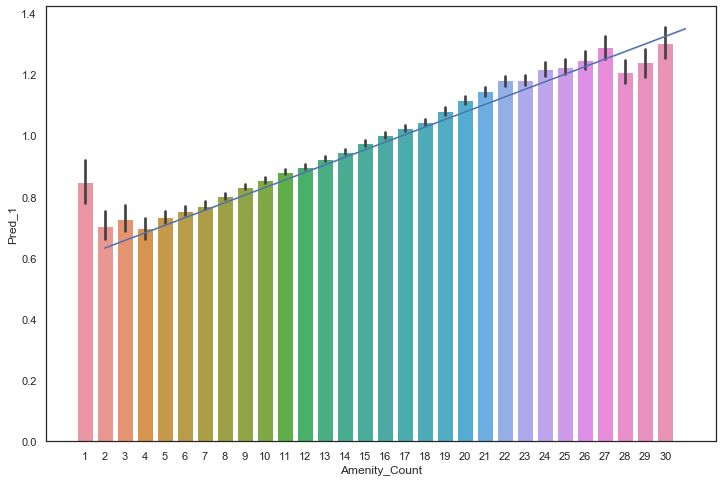

In [177]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_30,
                 x="Amenity_Count",
                 y="Normalized")
sns.lineplot(data=df_30,
            x="Amenity_Count", 
            y="Pred_1",
            ax=ax);

Looking at the R score and visualization of this regression, we deicde this is not the best fit. We are going to try polynomial regression instead 

### Regression 2

In [16]:
df_30["AC2"] = df_30["Amenity_Count"]*df_30["Amenity_Count"]

In [17]:
X2 = df_30[["AC2", "Amenity_Count", "Const"]]
y2 = df_30["Normalized"]

model2 = sm.OLS(y2, X2).fit()
result2 = model2.predict(X2)
df_30["Pred_2"] = result2

In [18]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     5419.
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:12:57   Log-Likelihood:            -4.2670e+05
No. Observations:              371013   AIC:                         8.534e+05
Df Residuals:                  371010   BIC:                         8.534e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
AC2           -3.056e-05    3.5e-05     -0.872      0.383   -9.92e-05    3.81e-05
Amenity_Count     0.0257      0.001     22.203      0.000       0.023       0.028
Const             0.6000      0.009     66.104      0.000       0.582       0.618
==============================================================================
Omnibus:                   276294.987   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7222761.587
Skew:                           3.352   Prob(JB):                         0.00
Kurtosis:                      23.549   Cond. No.                     2.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

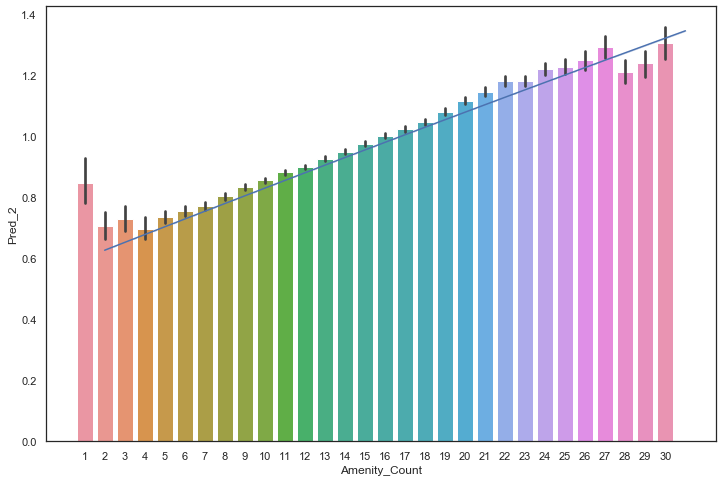

In [180]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_30,
                 x="Amenity_Count",
                 y="Normalized")
sns.lineplot(data=df_30,
            x="Amenity_Count", 
            y="Pred_2",
            ax=ax);

Looking at the R score and visualization of this regression, we deicde this is still not the best fit. We are going to try polynomial regression with a cubed value instead. 

### Regression 3

In [19]:
df_30["AC3"] = df_30["Amenity_Count"]*df_30["Amenity_Count"]*df_30["Amenity_Count"]

In [20]:
X3 = df_30[["AC3", "AC2", "Amenity_Count", "Const"]]
y3 = df_30["Normalized"]

model3 = sm.OLS(y3, X3).fit()
result3 = model3.predict(X3)
df_30["Pred_3"] = result3

In [21]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3636.
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:13:04   Log-Likelihood:            -4.2667e+05
No. Observations:              371013   AIC:                         8.533e+05
Df Residuals:                  371009   BIC:                         8.534e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
AC3           -3.823e-05   4.62e-06     -8.278      0.000   -4.73e-05   -2.92e-05
AC2               0.0018      0.000      8.046      0.000       0.001       0.002
Amenity_Count    -0.0018      0.004     -0.511      0.609      -0.009       0.005
Const             0.7196      0.017     42.181      0.000       0.686       0.753
==============================================================================
Omnibus:                   276258.983   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7221104.383
Skew:                           3.352   Prob(JB):                         0.00
Kurtosis:                      23.547   Cond. No.                     9.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

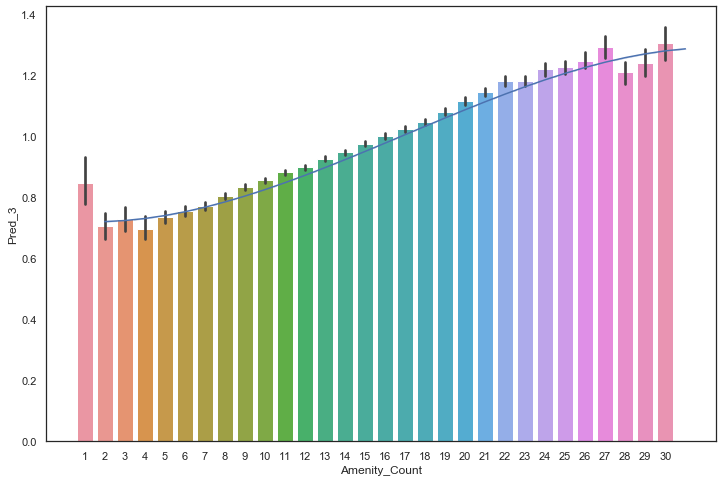

In [192]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_30,
                 x="Amenity_Count",
                 y="Normalized")
sns.lineplot(data=df_30,
            x="Amenity_Count", 
            y="Pred_3",
            ax=ax);

### Regression 4

In [22]:
df_30["AC4"] = df_30["Amenity_Count"]*df_30["Amenity_Count"]*df_30["Amenity_Count"]*df_30["Amenity_Count"]

In [23]:
X4 = df_30[["AC4", "AC3", "AC2", "Amenity_Count", "Const"]]
y4 = df_30["Normalized"]

model4 = sm.OLS(y4, X4).fit()
result4 = model4.predict(X4)
df_30["Pred_4"] = result4

In [24]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2729.
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:13:10   Log-Likelihood:            -4.2667e+05
No. Observations:              371013   AIC:                         8.533e+05
Df Residuals:                  371008   BIC:                         8.534e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
AC4           -1.322e-06   5.92e-07     -2.233      0.026   -2.48e-06   -1.62e-07
AC3            4.682e-05   3.84e-05      1.220      0.222   -2.84e-05       0.000
AC2           -4.158e-05      0.001     -0.048      0.962      -0.002       0.002
Amenity_Count     0.0146      0.008      1.794      0.073      -0.001       0.031
Const             0.6732      0.027     25.048      0.000       0.621       0.726
==============================================================================
Omnibus:                   276256.890   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7221002.405
Skew:                           3.352   Prob(JB):                         0.00
Kurtosis:                      23.547   Cond. No.                     3.75e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

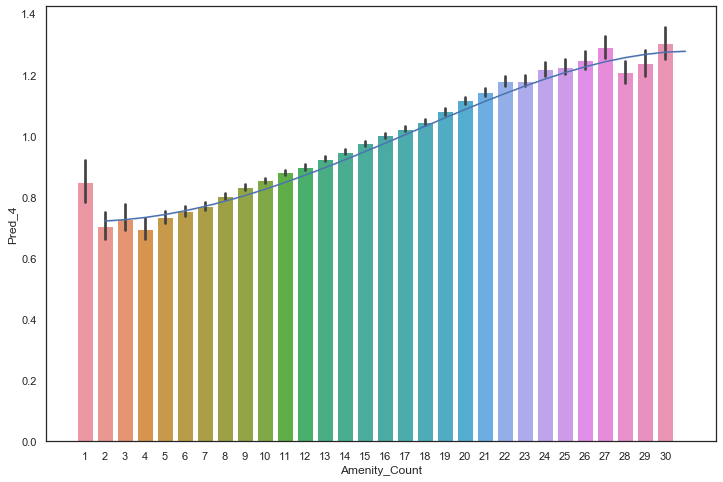

In [213]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_30,
                 x="Amenity_Count",
                 y="Normalized")
sns.lineplot(data=df_30,
            x="Amenity_Count", 
            y="Pred_4",
            ax=ax);

Although we are getting closer and close to idea p-values for all variables, we decided to do one more regression to see if the R or F values improve.

### 

In [ ]:
df_30["AC5"] = (df_30["Amenity_Count"]
                *df_30["Amenity_Count"]
                *df_30["Amenity_Count"]
                *df_30["Amenity_Count"]
                *df_30["Amenity_Count"])

In [26]:
X5 = df_30[["AC5", "AC4", "AC3", "AC2", "Amenity_Count", "Const"]]
y5 = df_30["Normalized"]

model5 = sm.OLS(y5, X5).fit()
result5 = model5.predict(X5)
df_30["Pred_5"] = result5

model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2185.
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:13:15   Log-Likelihood:            -4.2666e+05
No. Observations:              371013   AIC:                         8.533e+05
Df Residuals:                  371007   BIC:                         8.534e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
AC5            -2.71e-07    7.8e-08     -3.475      0.001   -4.24e-07   -1.18e-07
AC4            2.023e-05   6.23e-06      3.247      0.001    8.02e-06    3.24e-05
AC3              -0.0006      0.000     -3.148      0.002      -0.001      -0.000
AC2               0.0084      0.003      3.253      0.001       0.003       0.013
Amenity_Count    -0.0342      0.016     -2.103      0.036      -0.066      -0.002
Const             0.7660      0.038     20.222      0.000       0.692       0.840
==============================================================================
Omnibus:                   276242.534   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7220343.175
Skew:                           3.351   Prob(JB):                         0.00
Kurtosis:                      23.546   Cond. No.                     1.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

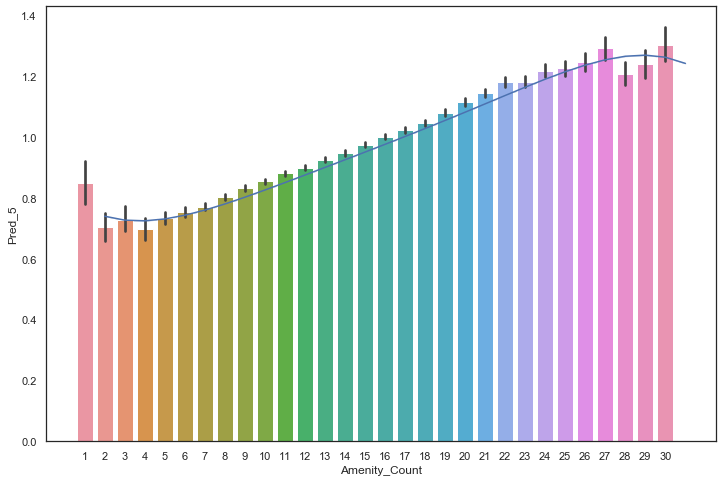

In [218]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_30,
                 x="Amenity_Count",
                 y="Normalized")
sns.lineplot(data=df_30,
            x="Amenity_Count", 
            y="Pred_5",
            ax=ax);

## Note: 
After a few days of deeper analysis, we decided that the 5-polynomial model was over fit, since we are looking at a sample of Airbnb listings. We decide to use the simple linear regression (Regression 1) along with other constants to expand our model. See notebook Perfecting_Regression_Model to follow our next steps.

Notebook Amenity_Count_vs_Price_2.ipynb has further analysis using the 5-polynomial model that after further analysis we decided not to use. If you are following along, please feel free to skip that notebook.

In [29]:
# df_30.to_pickle("../../Datasets/Data_viz_project/airbnb_listings_predictive")